In [112]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pickle
from pathlib import Path

In [45]:
def pad(img, height, width):
    img_h, img_w = img.shape
    pad_h_before = int((height - img_h) /2)
    pad_h_after = height - img_h - pad_h_before
    pad_w_before = int((width - img_w) /2)
    pad_w_after = width - img_w - pad_w_before
    return np.pad(img, ((pad_h_before, pad_h_after), (pad_w_before, pad_w_after)), 'constant', constant_values=(255))

In [96]:
d = {}
for i in os.listdir('data'):
    for f in os.listdir(f'data/{i}'):
        image = cv2.imread(f'data/{i}/{f}', cv2.IMREAD_GRAYSCALE)
        scale_percent = 25 # percent of original size
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dim = (width, height)
        
        # resize image
        resized = cv2.resize(image, dim, interpolation = cv2.INTER_LANCZOS4 )
        cv2.imwrite(f'data/{i}/{f.split(".")[0]}_resized.jpg', resized)

        d[f'{i}_{f.split(".")[0]}_resized.jpg'] = (resized.shape[0], resized.shape[1])

In [97]:
sorted_d = sorted(d.items(), key=lambda x:x[1][0], reverse=True)
print(sorted_d[:10])

[('Sofa_Atlantic Sofa_resized.jpg', (1302, 1302)), ('Bed_August King Bed_resized.jpg', (1228, 1228)), ('Sofa_Augustine Sofa-97-Dover Crescent_resized.jpg', (1125, 1125)), ('Sofa_Augustine Sofa-97-Orly Natural_resized.jpg', (1125, 1125)), ('Sofa_Augustine Sofa-97-Sapphire Navy_resized.jpg', (1125, 1125)), ('Sofa_Augustine Sofa-97-Deacon Wolf_resized.jpg', (1110, 1110)), ('Chair_Air Grid and Mesh Office Chair_resized.jpg', (1089, 773)), ('Chair_Archer Executive Chair_resized.jpg', (1030, 714)), ('Chair_Ariel Desk Chair_resized.jpg', (1020, 647)), ('Sofa_Archer Media Sofa-84_resized.jpg', (945, 945))]


In [ ]:
classes = {'Bed': 0, 'Sofa': 1, 'Chair': 2}
batch_size = 10
batch_count = 1
labels = []
images = []
for idx in range(0, len(sorted_d), batch_size):
    batch = sorted_d[idx: idx + batch_size]
    max_h = batch[0][1][0]
    max_w = list(sorted(batch, key=lambda x:x[1][1], reverse=True))[0][1][1]
    batch_labels = []
    batch_images = []
    for img in batch:
        index = img[0].find('_')
        label = img[0][:index]
        name = img[0][index+1:]
        image = cv2.imread(f'Data for test/{label}/{name}', cv2.IMREAD_GRAYSCALE)
        padded = pad(image, max_h, max_w)
        batch_images.append(padded)
        batch_labels.append(classes[label])
    labels.append(np.array(batch_labels))
    images.append(np.array(batch_images))
    batch_count += 1
    combined = [images, labels]
with open('dataset_resized.pkl', 'wb') as file:
    pickle.dump(combined, file)


0

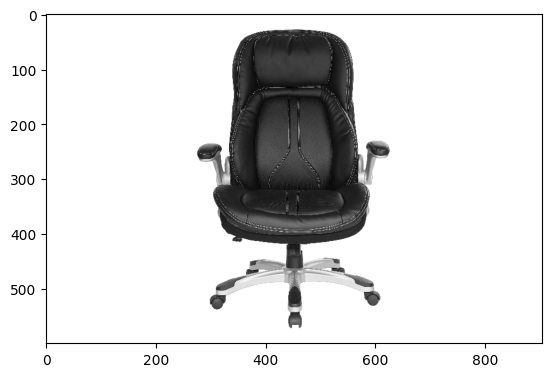

In [109]:
plt.imshow(combined[0][5][1], cmap='gray')
combined[1][2][1]